In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("insurance.csv")

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
sex_count = df['sex'].value_counts()

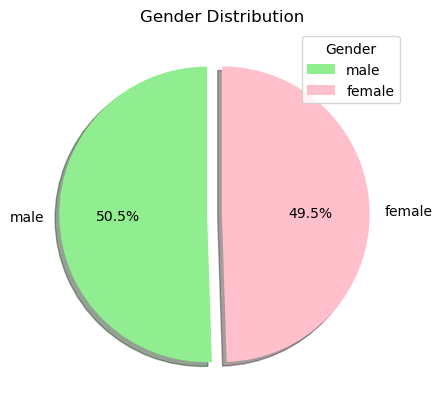

In [6]:
myexplode = [0.1, 0]
mycolors = ["lightgreen", "pink"]
plt.pie(sex_count,labels=sex_count.index, startangle=90,explode = myexplode,shadow = True,colors = mycolors,
       autopct = '%1.1f%%')
plt.title("Gender Distribution")
plt.legend(title="Gender")
plt.show()

In [96]:
children_count = df['children'].value_counts()
children_count

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0, 0.5, 'Population')

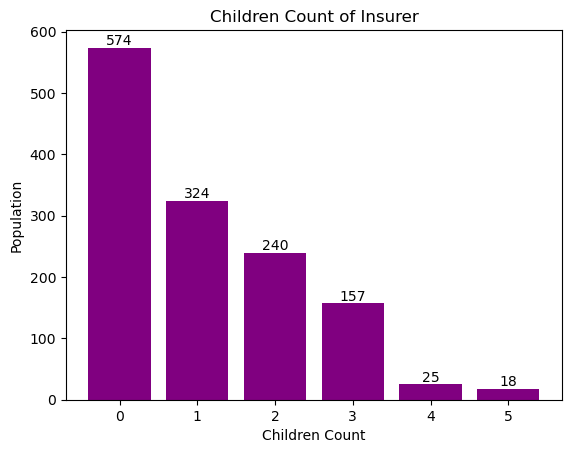

In [112]:
plt.bar(children_count.index,children_count.values,color="purple")
plt.title("Children Count of Insurer")
for i, count in enumerate(children_count):
    plt.text(i, count + 5, str(count), ha='center')
    #(i,count) -> took values of( 0, 574)(1,324)etc.
    # the enumerate function extracted index & values from variable(children_count)
plt.xlabel('Children Count')
plt.ylabel('Population')

In [9]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
overweight = df[df['bmi']>24.9]
overweight_count = overweight['bmi'].count()
overweight_percent = ((overweight_count/df['bmi'].count())*100).round(1)

overweight_percent_str = str(overweight_percent) + '%'
overweight_percent_str

'81.9%'

Text(0, 0.5, 'BMI level')

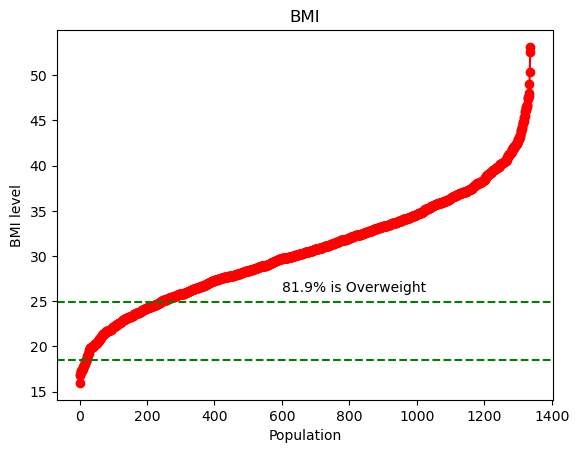

In [79]:
plt.plot(sorted(df['bmi']),marker='o',color='r')
plt.axhline(y=18.5,color='g', linestyle='--')
plt.axhline(y=24.9,color='g', linestyle='--')
plt.text(600,26,s=overweight_percent_str+" is Overweight")
plt.title('BMI')
plt.xlabel('Population')
plt.ylabel('BMI level')


Text(0.5, 1.0, 'Smoker')

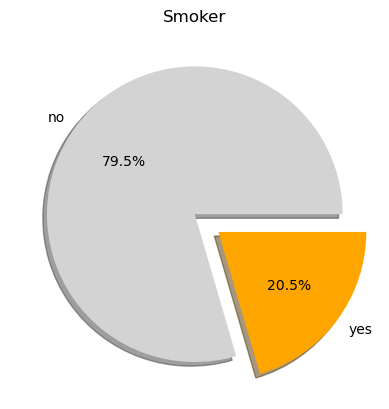

In [11]:
smoker_count = df['smoker'].value_counts()
smoker_color = ['lightgrey','orange']
smoker_explode = [0,0.2]
plt.pie(smoker_count,labels=smoker_count.index,autopct='%1.1f%%',colors = smoker_color, explode=smoker_explode,shadow = True)
plt.title("Smoker")

In [12]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
smoker_no = df[df['smoker'] == "no"]
smoker_yes = df[df['smoker'] == "yes"]

Text(0, 0.5, 'Do you Smoke ?')

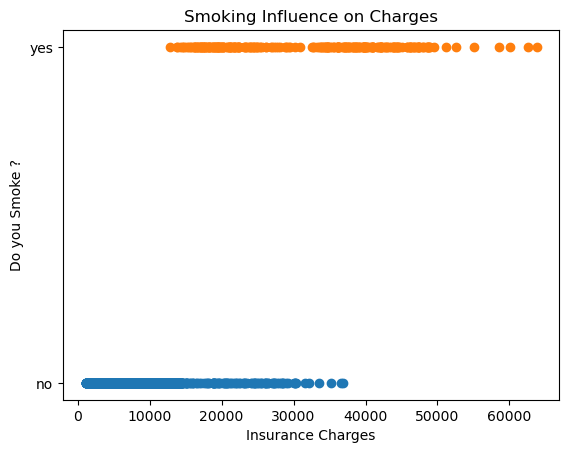

In [78]:
plt.scatter(smoker_no['charges'],smoker_no['smoker'])
plt.scatter(smoker_yes['charges'],smoker_yes['smoker'])
plt.title("Smoking Influence on Charges")
plt.xlabel('Insurance Charges')
plt.ylabel('Do you Smoke ?')

In [65]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
c_wise_data = df.groupby('children')['charges'].mean().round()
c_wise_data

children
0    12366.0
1    12731.0
2    15074.0
3    15355.0
4    13851.0
5     8786.0
Name: charges, dtype: float64

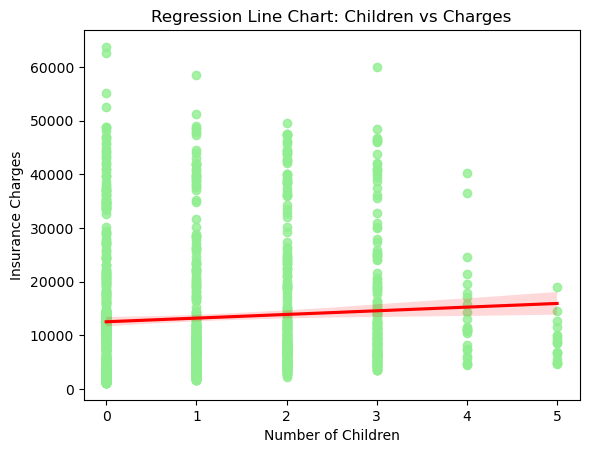

In [115]:
sns.regplot(x='children', y='charges', data=df,line_kws={'color': 'red'},color='lightgreen')
plt.title('Regression Line Chart: Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()